<a href="https://colab.research.google.com/github/vvrgit/NLP-LAB/blob/NLP-SRU/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Text Classification**

It is a supervised ML task

One of the widely used natural language processing task in different business problems is “Text Classification”. The goal of text classification is to automatically classify the text documents into one or more defined categories. Some examples of text classification are:

1. Understanding audience sentiment from social media,
2. Detection of spam and non-spam emails,
3. Auto tagging of customer queries, and
4. Categorization of news articles into defined topics.

**Application:**

1.   Email filtering
2.   Customer support (Identify must replied/important tweet)
3.   Sentiment analysis
4.   Language detection
5.   Fake news detection

**Approaches**



1.   Heuristic approach
2.   API (GCP, AWS, Azure, [nlpcloud](https://nlpcloud.com/))
3.   ML
4.   DL



**Problem Statement**

Classify the rating of movie as positive or negative based on viewer review available on IMDB data

**Step 1: Load Data**

In [116]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/AI Data/NLP Data/SRU.csv",encoding='windows-1252')
df.head()

,Comments in siksha,Class
0,"I am very satisfied with the college, and I re...",positive
1,Our college has good faculty members,positive
2,I am satisfied with this college,positive
3,Absolutely valuable for money,positive
4,I am satisfied with this college because of it...,positive


**Step 2: Text Preprocessing**


1.   HTML tag Removal
2.   Remove URLs
3.   Handling Emojis
4.   Chat Word Treatment
5.   Remove Punctuations
6.   Data Lowercasing
7.   Removing stopwords
8.   Spelling Correction
9.  Tokenization
10.  Lemmatization



**HTML tag Removal**

In [117]:
import re
def remove_html_tag(text):
  pattern=re.compile('<.*?>')
  return pattern.sub(r'',str(text))

In [118]:
df["Comments in siksha"]=df["Comments in siksha"].apply(remove_html_tag)
df["Comments in siksha"].head()

0    I am very satisfied with the college, and I re...
1                 Our college has good faculty members
2                     I am satisfied with this college
3                        Absolutely valuable for money
4    I am satisfied with this college because of it...
Name: Comments in siksha, dtype: object

**Remove URLs**

In [119]:
import re
def remove_url(text):
  pattern=re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',str(text))

In [120]:
df["Comments in siksha"]=df["Comments in siksha"].apply(remove_url)
df["Comments in siksha"].head()

0    I am very satisfied with the college, and I re...
1                 Our college has good faculty members
2                     I am satisfied with this college
3                        Absolutely valuable for money
4    I am satisfied with this college because of it...
Name: Comments in siksha, dtype: object

**Handling Emojis**

In [121]:
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
import emoji
def replace_emoji(text):
  text = emoji.demojize(text)
  return text

In [123]:
df["Comments in siksha"]=df["Comments in siksha"].apply(replace_emoji)
df["Comments in siksha"].head()

0    I am very satisfied with the college, and I re...
1                 Our college has good faculty members
2                     I am satisfied with this college
3                        Absolutely valuable for money
4    I am satisfied with this college because of it...
Name: Comments in siksha, dtype: object

**Chat Word Treatment**

In [124]:
chat_words = {
'AFAIK':'As Far As I Know',
'AFK':'Away From Keyboard',
'ASAP':'As Soon As Possibl',
'ATK':'At The Keyboard',
'ATM':'At The Moment',
'A3':'Anytime, Anywhere, Anyplace',
'BAK':'Back At Keyboard',
'BBL':'Be Back Later',
'BBS':'Be Back Soon',
'BFN':'Bye For Now',
'B4N':'Bye For Now',
'BRB':'Be Right Back',
'BRT':'Be Right There',
'BTW':'By The Way',
'B4':'Before',
'B4N':'Bye For Now',
'CU':'See You',
'CUL8R':'See You Later',
'CYA':'See You',
'FAQ':'Frequently Asked Questions',
'FC':'Fingers Crossed',
'FWIW':'For What Its Worth',
'FYI':'For Your Information',
'GAL':'Get A Life',
'GG':'Good Game',
'GN':'Good Night',
'GMTA':'Great Minds Think Alike',
'GR8':'Great!',
'G9':'Genius',
'IC':'I See',
'ICQ':'I Seek you',
'ILU':'I Love You',
'IMHO':'In My Honest/Humble Opinion',
'IMO':'In My Opinion',
'IOW':'In Other Words',
'IRL':'In Real Life',
'KISS':'Keep It Simple, Stupid',
'LDR':'Long Distance Relationship',
'LMAO':'Laugh My A.. Off',
'LOL':'Laughing Out Loud',
'LTNS':'Long Time No See',
'L8R':'Later',
'MTE':'My Thoughts Exactly',
'M8':'Mate',
'NRN':'No Reply Necessary',
'OIC':'Oh I See',
'PITA':'Pain In The A..',
'PRT':'Party',
'PRW':'Parents Are Watching',
'ROFL':'Rolling On The Floor Laughing',
'ROFLOL':'Rolling On The Floor Laughing Out Loud',
'ROTFLMAO':'Rolling On The Floor Laughing My A.. Off',
'SK8':'Skate',
'STATS':'Your sex and age',
'ASL':'Age, Sex, Location',
'THX':'Thank You',
'TTFN':'Ta-Ta For Now!',
'TTYL':'Talk To You Later',
'U':'You',
'U2':'You Too',
'U4E':'Yours For Ever',
'WB':'Welcome Back',
'WTF':'What The F...',
'WTG':'Way To Go!',
'WUF':'Where Are You From?',
'W8':'Wait...'
}

In [125]:
def chat_conversion(text):
  new_text=[]
  for w in text.split():
    if w.upper() in chat_words:
      new_text.append(chat_words[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)

In [126]:
df["Comments in siksha"]=df["Comments in siksha"].apply(chat_conversion)
df["Comments in siksha"].head()

0    I am very satisfied with the college, and I re...
1                 Our college has good faculty members
2                     I am satisfied with this college
3                        Absolutely valuable for money
4    I am satisfied with this college because of it...
Name: Comments in siksha, dtype: object

**Remove Punctuations**

In [127]:
import string,time
execlude=string.punctuation


def remove_punc_method2(text):
  return text.translate(str.maketrans('','',execlude))

In [128]:
df["Comments in siksha"]=df["Comments in siksha"].apply(remove_punc_method2)
df["Comments in siksha"].head()

0    I am very satisfied with the college and I rec...
1                 Our college has good faculty members
2                     I am satisfied with this college
3                        Absolutely valuable for money
4    I am satisfied with this college because of it...
Name: Comments in siksha, dtype: object

**Data LowerCasing**

In [129]:
df['Comments in siksha']=df['Comments in siksha'].str.lower()
df['Comments in siksha'].head()

0    i am very satisfied with the college and i rec...
1                 our college has good faculty members
2                     i am satisfied with this college
3                        absolutely valuable for money
4    i am satisfied with this college because of it...
Name: Comments in siksha, dtype: object

**Stop Words Removal**

In [130]:
import nltk
stop_words=nltk.download('stopwords') # a, an, the, am, is etc.
from nltk.corpus import stopwords
def Remove_Stopwords(text):
  new_text=[]
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x=new_text[:]
  new_text.clear()
  return " ".join(x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
df['Comments in siksha']=df['Comments in siksha'].apply(Remove_Stopwords)
df['Comments in siksha'].head()

0                    satisfied   college   recommend 
1                       college  good faculty members
2                                 satisfied   college
3                          absolutely valuable  money
4      satisfied   college    course  faculty members
Name: Comments in siksha, dtype: object

**Lemmatization**


In [132]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [133]:
def lemmatization(text):
  from nltk.stem import WordNetLemmatizer 
  lemmatizer = WordNetLemmatizer()
  return " ".join(lemmatizer.lemmatize(word, pos ="v") for word in text.split())

In [134]:
df['Comments in siksha']=df['Comments in siksha'].apply(lemmatization)
df['Comments in siksha'].head()

0                 satisfy college recommend
1              college good faculty members
2                           satisfy college
3                 absolutely valuable money
4    satisfy college course faculty members
Name: Comments in siksha, dtype: object

In [135]:
df['Class'].value_counts()

positive    8
Negative    6
Name: Class, dtype: int64

In [136]:
df.isnull().sum()

Comments in siksha    0
Class                 0
dtype: int64

In [137]:
df.duplicated().sum()

0

In [138]:
df.drop_duplicates(inplace=True)

In [139]:
df.duplicated().sum()

0

In [140]:
df.head()

,Comments in siksha,Class
0,satisfy college recommend,positive
1,college good faculty members,positive
2,satisfy college,positive
3,absolutely valuable money,positive
4,satisfy college course faculty members,positive


In [141]:
x=df.iloc[:,0:1]
x

,Comments in siksha
0,satisfy college recommend
1,college good faculty members
2,satisfy college
3,absolutely valuable money
4,satisfy college course faculty members
5,placement cell work good benefit students sati...
6,im dissatisfy college
7,college offer good course
8,best university best future total telangana
9,strict rule go campus need friendly relation c...


In [142]:
y=df['Class']
y

0     positive
1     positive
2     positive
3     positive
4     positive
5     positive
6     Negative
7     positive
8     positive
9     Negative
10    Negative
11    Negative
12    Negative
13    Negative
Name: Class, dtype: object

In [143]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [145]:
X_train.shape

(11, 1)

In [146]:
X_test.shape

(3, 1)

In [147]:
y_test.shape

(3,)

**Text Vectorization using bag words**

In [148]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['Comments in siksha']).toarray()
X_test_bow = cv.transform(X_test['Comments in siksha']).toarray()

In [149]:
X_train_bow[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [150]:
X_train_bow.shape

(11, 38)

**Random Forest Model**

In [151]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

**Model Training**

In [152]:
rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train)

RandomForestClassifier()

**Model Accuracy**

In [153]:
y_pred = rf.predict(X_test_bow)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [155]:
y_pred_train = rf.predict(X_train_bow)

In [156]:
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 1.0


**Model Tuning**

In [157]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_bow, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fdf00c41b40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fdf03359720>})

In [158]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 327}


**Model Evaluation**

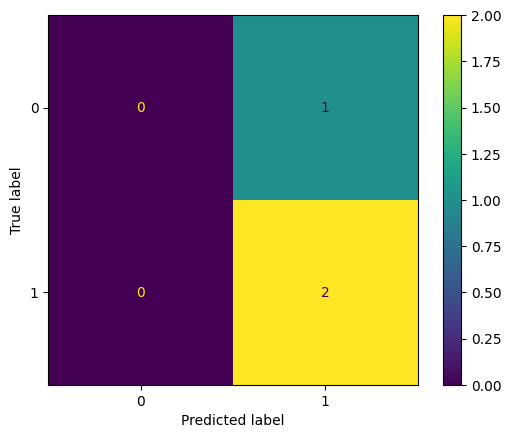

In [159]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test_bow)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [160]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 1.0


**Text Vectorization using bi-gram**

In [179]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))
X_train_bow = cv.fit_transform(X_train['Comments in siksha']).toarray()
X_test_bow = cv.transform(X_test['Comments in siksha']).toarray()

In [180]:
X_train_bow[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [181]:
X_train_bow[0].shape

(43,)

**Logistic Regression Model**

In [182]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

**Model Training**

In [183]:
# fit the model with data
logreg.fit(X_train_bow, y_train)

LogisticRegression(random_state=16)

**Model Testing**

In [184]:
y_pred = logreg.predict(X_test_bow)

**Model Evaluation**

In [185]:
y_pred = logreg.predict(X_test_bow)
y_pred_train=logreg.predict(X_train_bow)

In [186]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666


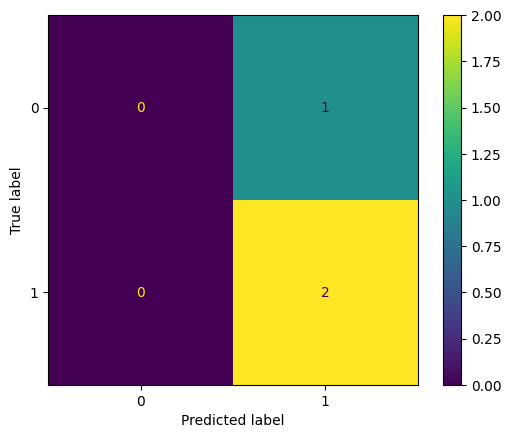

In [187]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

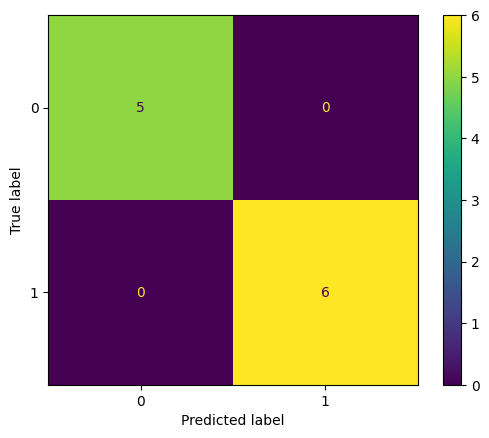

In [188]:
cm = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [189]:
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)

print("accuracy_test:", accuracy_test)
print("precision_test:", precision_test)
print("recall_test:", recall_test)

accuracy_test: 0.6666666666666666
precision_test: 0.6666666666666666
recall_test: 1.0


In [190]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_test = recall_score(y_train, y_pred_train)

print("accuracy_train:", accuracy_train)
print("precision_test:", precision_test)
print("recall_test:", recall_test)

accuracy_train: 1.0
precision_test: 0.6666666666666666
recall_test: 1.0


In [199]:
inp=input('Write review')

Write reviewOur college has good faculty members


In [200]:
df = pd.DataFrame(columns=['review'])
df.at[0,'review'] = inp
df.head()

,review
0,Our college has good faculty members


**Text Vectorization using uni-bi-gram**

In [212]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
X_train_bow = cv.fit_transform(X_train['Comments in siksha']).toarray()
X_test_bow = cv.transform(X_test['Comments in siksha']).toarray()

In [ ]:
cv.vocabulary_

In [216]:
X_train_bow[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [217]:
X_train_bow.shape

(11, 81)

**Decision Tree Classifier**

In [210]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

**Model Training**

In [218]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_bow,y_train)

**Model Testing**

In [220]:
#Predict the response for test dataset
y_pred = clf.predict(X_test_bow)

In [221]:
y_pred_train = clf.predict(X_train_bow)

**Model Evaluation**

In [222]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 1.0
Testing Accuracy: 0.3333333333333333


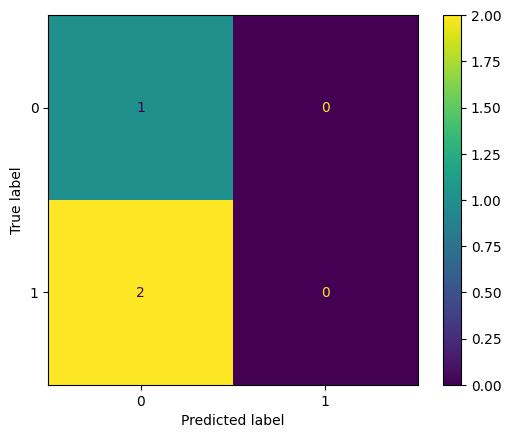

In [223]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

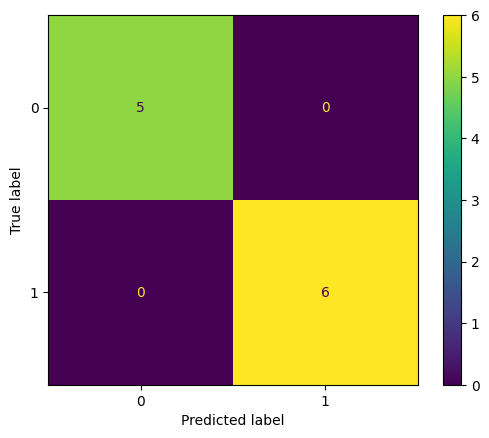

In [225]:
cm = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [226]:
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)

print("accuracy_test:", accuracy_test)
print("precision_test:", precision_test)
print("recall_test:", recall_test)

accuracy_test: 0.3333333333333333
precision_test: 0.0
recall_test: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [227]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_test = recall_score(y_train, y_pred_train)

print("accuracy_train:", accuracy_train)
print("precision_test:", precision_test)
print("recall_test:", recall_test)

accuracy_train: 1.0
precision_test: 0.0
recall_test: 1.0


**Load Data**

In [238]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/AI Data/NLP Data/SRU.csv",encoding='windows-1252')
df.head()

,Comments in siksha,Class
0,"I am very satisfied with the college, and I re...",positive
1,Our college has good faculty members,positive
2,I am satisfied with this college,positive
3,Absolutely valuable for money,positive
4,I am satisfied with this college because of it...,positive


In [ ]:
x=df.iloc[:,0:1]
x['Comments in siksha']

In [ ]:
y=df.iloc[:,1]
y

**Text Vectorization using TF-IDF**

In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_tfidf=tfidf.fit_transform(x['Comments in siksha']).toarray()

In [244]:
x_tfidf[0]

array([0.        , 0.34818226, 0.31471852, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2442344 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.39132452, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.45213011, 0.        , 0.        ,
       0.        , 0.31471852, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.2442344 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.34818226, 0.        , 0.        , 0.        ,
       0.        , 0.28737666, 0.        , 0.        , 0.     

In [245]:
x_tfidf.shape

(14, 75)

**Label encoder**

In [246]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

**Split Data**

In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_tfidf,y,test_size=0.2,random_state=1)

In [252]:
print(X_train.shape,X_test.shape)

(11, 75) (3, 75)


**SVM Model Initialization**

In [253]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kerne


**Model Training**

In [254]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

**Model Testing**

In [258]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [259]:
y_pred.shape

(3,)

**Model Evaluation**

In [260]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [261]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666


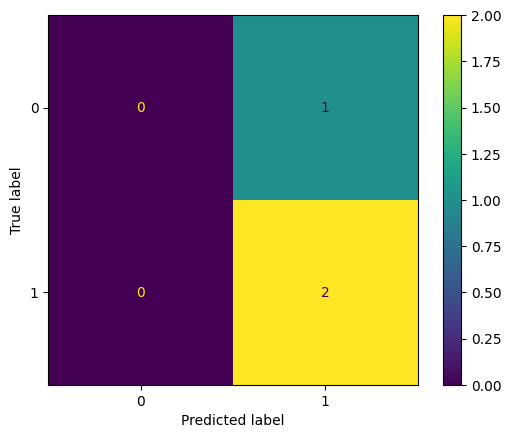

In [262]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

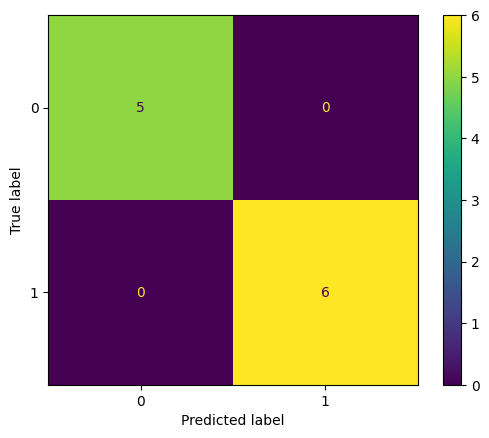

In [263]:
cm = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)

print("accuracy_test:", accuracy_test)
print("precision_test:", precision_test)
print("recall_test:", recall_test)

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_test = recall_score(y_train, y_pred_train)

print("accuracy_train:", accuracy_train)
print("precision_test:", precision_test)
print("recall_test:", recall_test)

**Word Embeddeing : SR University**

In [320]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [321]:
import gensim
from gensim.models import Word2Vec
import os

In [322]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [323]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
story = []
f = open('/content/drive/MyDrive/AI Data/NLP Data/SRUstory.txt',encoding='latin1')
corpus = f.read()
raw_sent = sent_tokenize(corpus)
for sent in raw_sent:
  story.append(simple_preprocess(sent))

**Word2Vec:SkipGram**

In [324]:
#sg=1: skip-gram
#sg=0: cBoW
model = Word2Vec(story, vector_size=100, window=5, min_count=1, workers=4,sg=1)
model.save("word2vec.model")

In [325]:
model = Word2Vec.load("word2vec.model")

In [326]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(1673, 2525)

In [327]:
model.wv.most_similar('sru')

[('and', 0.6415495872497559),
 ('it', 0.6124573945999146),
 ('college', 0.5862886309623718),
 ('faculty', 0.5842379331588745),
 ('of', 0.5772340297698975),
 ('to', 0.5702216029167175),
 ('regional', 0.5680805444717407),
 ('city', 0.564823567867279),
 ('with', 0.5510960817337036),
 ('industry', 0.5370157957077026)]

In [328]:
model.wv['sru']

array([-0.00063119,  0.0128439 ,  0.00303385, -0.00560532,  0.01006556,
       -0.01235149,  0.01082218,  0.01498789, -0.00955367, -0.008384  ,
       -0.00628022, -0.01281595,  0.00518385, -0.00441909,  0.00793654,
       -0.01326707,  0.00401318, -0.00589846,  0.0029945 , -0.01818204,
        0.00840312, -0.00581271, -0.00075128, -0.00923692, -0.00195634,
       -0.00203035, -0.00463164, -0.01185047, -0.00204551,  0.00053379,
        0.00258872,  0.00443168, -0.00392569, -0.00685347,  0.00189231,
        0.01431772, -0.00952103,  0.00338361,  0.00231201, -0.01257225,
        0.00953318, -0.01402581,  0.00616682,  0.00877316,  0.00566817,
       -0.00953161, -0.00337609, -0.00606185,  0.00480426,  0.00286292,
        0.01256725,  0.00728534,  0.00979189, -0.00497102,  0.00732372,
        0.00129492,  0.00643861,  0.00260317, -0.00369196,  0.00684479,
       -0.0031632 , -0.00554708, -0.00536321, -0.00052925, -0.00096446,
        0.00359739,  0.0066705 ,  0.01126654, -0.00158906, -0.00

**Load Data**

In [329]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/AI Data/NLP Data/SRU.csv",encoding='windows-1252')
df.head()

,Comments in siksha,Class
0,"I am very satisfied with the college, and I re...",positive
1,Our college has good faculty members,positive
2,I am satisfied with this college,positive
3,Absolutely valuable for money,positive
4,I am satisfied with this college because of it...,positive


In [330]:
x=df.iloc[:,0:1]
x

,Comments in siksha
0,"I am very satisfied with the college, and I re..."
1,Our college has good faculty members
2,I am satisfied with this college
3,Absolutely valuable for money
4,I am satisfied with this college because of it...
5,Placement cell works Good for the benefit of s...
6,I'm dissatisfied with this college
7,Our college offers good courses
8,Best university for the best future in total T...
9,very strict rules to go out of the campus we n...


In [331]:
y=df.iloc[:,1]
y

0     positive
1     positive
2     positive
3     positive
4     positive
5     positive
6     Negative
7     positive
8     positive
9     Negative
10    Negative
11    Negative
12    Negative
13    Negative
Name: Class, dtype: object

**Label Encoder**

In [332]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

**Split Data**

In [333]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Comments in siksha'], y, test_size=0.2, random_state=42)

**Process Data**

In [334]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [335]:
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

**Text Vectorization Using Cistom WordVec**

In [336]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [model.wv[word] for word in words if word in model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [337]:
X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

**Gaussian Naive Bayes Model Initialization**

In [338]:
from sklearn.naive_bayes import GaussianNB
# Build a Gaussian Classifier
GNB = GaussianNB()

**Model Training**

In [339]:
# Model training
GNB.fit(X_train, y_train)

GaussianNB()

**Model Testing**

In [340]:
# Predict Output
predicted = GNB.predict([X_test[2]])

print("Actual Value:", y_test[2])
print("Predicted Value:", predicted[0])

Actual Value: 1
Predicted Value: 1


**Model Evaluation**

In [341]:
y_pred = GNB.predict(X_test)
y_pred_train = GNB.predict(X_train)

In [342]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 1.0
Testing Accuracy: 0.3333333333333333


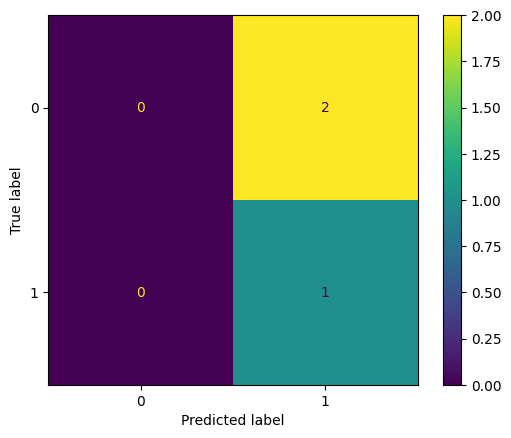

In [343]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

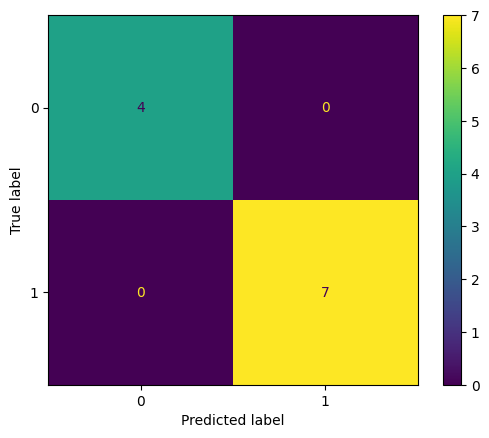

In [344]:
cm = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [345]:
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)

print("accuracy_test:", accuracy_test)
print("precision_test:", precision_test)
print("recall_test:", recall_test)

accuracy_test: 0.3333333333333333
precision_test: 0.3333333333333333
recall_test: 1.0


In [346]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_test = recall_score(y_train, y_pred_train)

print("accuracy_train:", accuracy_train)
print("precision_test:", precision_test)
print("recall_test:", recall_test)

accuracy_train: 1.0
precision_test: 0.3333333333333333
recall_test: 1.0


**Prediction**

In [347]:
inp=input('Write Review on SRU')

Write Review on SRUSRU is good for academics


In [348]:
df = pd.DataFrame(columns=['review'])
df.at[0,'review'] = inp
df.head()

,review
0,SRU is good for academics


In [349]:
review = df['review'].apply(preprocess)
review

0    sru good academics
Name: review, dtype: object

In [350]:
comment = np.array([vectorize(sentence) for sentence in review])

In [351]:
y_pred = GNB.predict(comment)

In [352]:
y_pred

array([1])